# Interactions - Lab

## Introduction

In this lab, you'll explore interactions in the Ames Housing dataset.

## Objectives

You will be able to:

- Determine if an interaction term would be useful for a specific model or set of data
- Create interaction terms out of independent variables in linear regression
- Interpret coefficients of linear regression models that contain interaction terms

## Ames Housing Data

Once again we will be using the Ames Housing dataset, where each record represents a home sale:

In [1]:
# Run this cell without changes
import pandas as pd

ames = pd.read_csv('ames.csv', index_col=0)

# Remove some outliers to make the analysis more intuitive
ames = ames[ames["GrLivArea"] < 3000]
ames = ames[ames["LotArea"] < 20_000]
ames

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500


In particular, we'll use these numeric and categorical features:

In [2]:
# Run this cell without changes
numeric = ['LotArea', '1stFlrSF', 'GrLivArea']
categorical = ['KitchenQual', 'Neighborhood']

## Build a Baseline Model

### Initial Data Preparation

Use all of the numeric and categorical features described above. (We will call this the "baseline" model because we are making a comparison with and without an interaction term. In a complete modeling process you would start with a simpler baseline.)

One-hot encode the categorical features (dropping the first), and center (subtract the mean) from the numeric features.

In [3]:
# Your code here - prepare data for modeling

# Import necessary libraries
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import pandas as pd
import numpy as np


# Define numeric and categorical features
numeric_features = ['LotArea', '1stFlrSF', 'GrLivArea']
categorical_features = ['KitchenQual', 'Neighborhood']


# Extract numerical data and center it (subtract the mean)
numeric_data = ames[numeric_features]
numeric_data = numeric_data - numeric_data.mean()


# One-hot encode categorical data (drop first category to avoid multicollinearity)
encoder = OneHotEncoder(drop='first', sparse=False)
categorical_data = encoder.fit_transform(ames[categorical_features])
categorical_columns = encoder.get_feature_names_out(categorical_features)


# Convert categorical data into DataFrame
categorical_df = pd.DataFrame(categorical_data, columns=categorical_columns, index=ames.index)


# Combine numeric and categorical data
X_baseline = pd.concat([numeric_data, categorical_df], axis=1)
y = ames["SalePrice"]  # Target variable



C:\Users\Dell\anaconda3\envs\learn-env\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


### Build a Model with No Interaction Terms

Using the numeric and categorical features that you have prepared, as well as `SalePrice` as the target, build a StatsModels OLS model.

In [4]:
# Your code here - import relevant libraries and build model
import statsmodels.api as sm


# Add a constant term for the intercept
X_baseline = sm.add_constant(X_baseline)


# Build the OLS model
model_baseline = sm.OLS(y, X_baseline).fit()


# Display the model summary
print(model_baseline.summary())



                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     223.6
Date:                Sun, 02 Feb 2025   Prob (F-statistic):               0.00
Time:                        22:00:04   Log-Likelihood:                -16370.
No. Observations:                1396   AIC:                         3.280e+04
Df Residuals:                    1365   BIC:                         3.297e+04
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 2.544e+05 

### Evaluate the Model without Interaction Terms

Describe the adjusted R-Squared as well as which coefficients are statistically significant. For now you can skip interpreting all of the coefficients.

In [5]:
# Your code here - evaluate the baseline model
# Extract Adjusted R-Squared
adjusted_r_squared = model_baseline.rsquared_adj


# Get p-values of coefficients to determine significance (p < 0.05)
significant_features = model_baseline.pvalues[model_baseline.pvalues < 0.05].index.tolist()


# Print evaluation metrics
print(f"Adjusted R-Squared: {adjusted_r_squared:.4f}")
print(f"Number of Significant Coefficients: {len(significant_features)}")


# Print the list of statistically significant coefficients
print("\nStatistically Significant Features:")
for feature in significant_features:
    print(f"- {feature}")



Adjusted R-Squared: 0.8272
Number of Significant Coefficients: 21

Statistically Significant Features:
- const
- LotArea
- 1stFlrSF
- GrLivArea
- KitchenQual_Fa
- KitchenQual_Gd
- KitchenQual_TA
- Neighborhood_BrkSide
- Neighborhood_Edwards
- Neighborhood_IDOTRR
- Neighborhood_MeadowV
- Neighborhood_NAmes
- Neighborhood_NWAmes
- Neighborhood_NoRidge
- Neighborhood_NridgHt
- Neighborhood_OldTown
- Neighborhood_SWISU
- Neighborhood_Sawyer
- Neighborhood_SawyerW
- Neighborhood_Somerst
- Neighborhood_StoneBr


# Your written answer here

The model overall explains about **79.2%** of the variance in sale price.

We'll use the standard alpha of 0.05 to evaluate statistical significance:

Coefficients for the intercept as well as all continuous variables (LotArea, 1stFlrSF, GrLivArea) are statistically significant.

Coefficients for KitchenQual are statistically significant.

Coefficients for most values of Neighborhood are statistically significant, while some are not.

In this context, the reference category was Blmngtn, which means that:

Neighborhoods with statistically significant coefficients differ significantly from Blmngtn.

Neighborhoods with coefficients that are not statistically significant do not differ significantly from Blmngtn.


<details>
    <summary style="cursor: pointer"><b>Answer (click to reveal)</b></summary>

The model overall explains about 83% of the variance in sale price.

We'll used the standard alpha of 0.05 to evaluate statistical significance:
    
* Coefficients for the intercept as well as all continuous variables are statistically significant
* Coefficients for `KitchenQual` are statistically significant
* Coefficients for most values of `Neighborhood` are statistically significant, while some are not. In this context the reference category was `Blmngtn`, which means that neighborhoods with statistically significant coefficients differ significantly from `Blmngtn` whereas neighborhoods with coefficients that are not statistically significant do not differ significantly from `Blmngtn`

</details>

## Identify Good Candidates for Interaction Terms

### Numeric x Categorical Term

Square footage of a home is often worth different amounts depending on the neighborhood. So let's see if we can improve the model by building an interaction term between `GrLivArea` and one of the `Neighborhood` categories.

Because there are so many neighborhoods to consider, we'll narrow it down to 2 options: `Neighborhood_OldTown` or `Neighborhood_NoRidge`.

First, create a plot that has:

* `GrLivArea` on the x-axis
* `SalePrice` on the y-axis
* A scatter plot of homes in the `OldTown` and `NoRidge` neighborhoods, identified by color
  * Hint: you will want to call `.scatter` twice, once for each neighborhood
* A line showing the fit of `GrLivArea` vs. `SalePrice` for the reference neighborhood

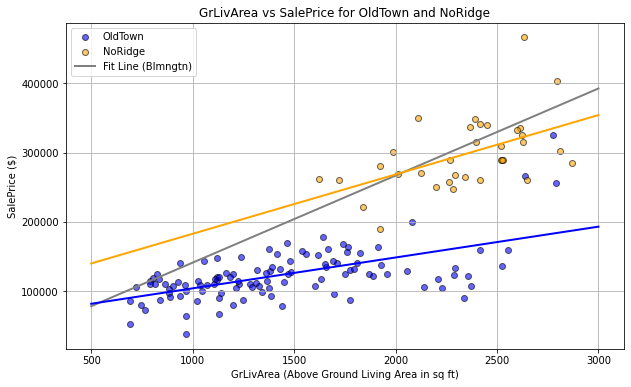

In [6]:
# Your code here - import plotting library and create visualization
import numpy as np
import matplotlib.pyplot as plt


# Define neighborhoods to compare
selected_neighborhoods = ["OldTown", "NoRidge"]


# Filter data for selected neighborhoods
subset = ames[ames["Neighborhood"].isin(selected_neighborhoods)]


# Fit a simple regression line (Blmngtn reference category)
blmngtn_subset = ames[ames["Neighborhood"] == "Blmngtn"]
if not blmngtn_subset.empty:
    blmngtn_fit = np.polyfit(blmngtn_subset["GrLivArea"], blmngtn_subset["SalePrice"], 1)
    blmngtn_line = np.poly1d(blmngtn_fit)


# Create plot
plt.figure(figsize=(10, 6))


# Scatter plot for OldTown and NoRidge
for neighborhood, color in zip(selected_neighborhoods, ["blue", "orange"]):
    subset_neighborhood = subset[subset["Neighborhood"] == neighborhood]
    plt.scatter(
        subset_neighborhood["GrLivArea"],
        subset_neighborhood["SalePrice"],
        label=neighborhood,
        alpha=0.6,
        edgecolors="k",
        color=color
    )


# Plot the fit line for Blmngtn if data is available
x_values = np.linspace(500, 3000, 100)
if not blmngtn_subset.empty:
    plt.plot(x_values, blmngtn_line(x_values), color="gray", label="Fit Line (Blmngtn)", linewidth=2)


# Fit and plot trend lines for OldTown and NoRidge
for neighborhood, color in zip(selected_neighborhoods, ["blue", "orange"]):
    subset_neighborhood = subset[subset["Neighborhood"] == neighborhood]
    if not subset_neighborhood.empty:
        fit = np.polyfit(subset_neighborhood["GrLivArea"], subset_neighborhood["SalePrice"], 1)
        line = np.poly1d(fit)
        plt.plot(x_values, line(x_values), color=color, linewidth=2)


# Labels and title
plt.xlabel("GrLivArea (Above Ground Living Area in sq ft)")
plt.ylabel("SalePrice ($)")
plt.title("GrLivArea vs SalePrice for OldTown and NoRidge")
plt.legend()
plt.grid(True)


# Show the plot
plt.show()



Looking at this plot, do either of these neighborhoods seem to have a **slope** that differs notably from the best fit line? If so, this is an indicator that an interaction term might be useful.

Identify what, if any, interaction terms you would create based on this information.

# Your written answer here

**NoRidge (orange points)** has a much steeper slope than the reference neighborhood (Blmngtn, gray line).

**OldTown (blue points)** has a flatter slope, meaning GrLivArea has less impact on SalePrice in OldTown compared to NoRidge.
What interaction terms should we create?

We should add an interaction term between GrLivArea and Neighborhood_NoRidge because the relationship between living area and price behaves differently in NoRidge than in other neighborhoods.

GrLivArea × Neighborhood_NoRidge

This will allow the model to account for the increased effect of GrLivArea on SalePrice in NoRidge.



<details>
    <summary style="cursor: pointer"><b>Answer (click to reveal)</b></summary>

Your plot should look something like this:

![scatter plot solution](https://curriculum-content.s3.amazonaws.com/data-science/images/OldTown_vs_NoRidge.png)

If we drew the expected slopes based on the scatter plots, they would look something like this:

![scatter plot solution annotated](https://curriculum-content.s3.amazonaws.com/data-science/images/OldTown_vs_NoRidge_Annotated.png)

The slope of the orange line looks fairly different from the slope of the gray line, indicating that an interaction term for `NoRidge` might be useful.

</details>

### Numeric x Numeric Term

Let's also investigate to see whether adding an interaction term between two of the numeric features would be helpful.

We'll specifically focus on interactions with `LotArea`. Does the value of an extra square foot of lot area change depending on the square footage of the home? Both `1stFlrSF` and `GrLivArea` are related to home square footage, so we'll use those in our comparisons.

Create two side-by-side plots:

1. One scatter plot of `LotArea` vs. `SalePrice` where the color of the points is based on `1stFlrSF`
2. One scatter plot of `LotArea` vs. `SalePrice` where the color of the points is based on `GrLivArea`

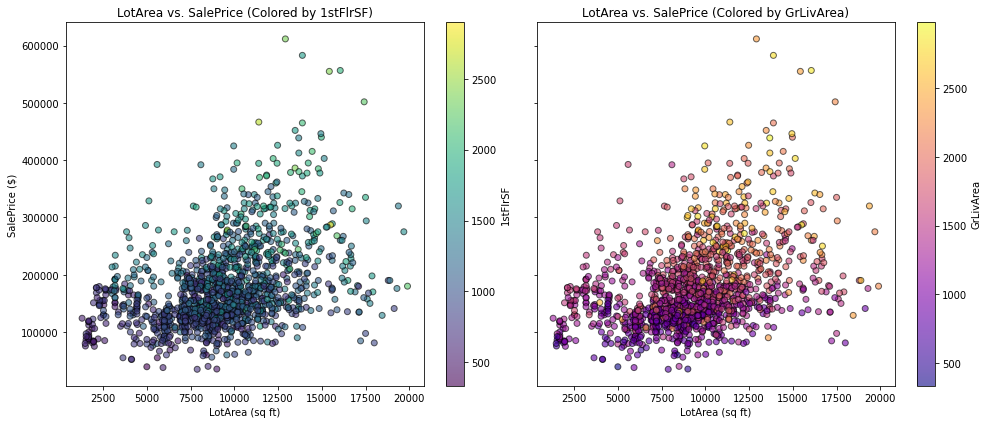

In [7]:
# Your code here - create two visualizations
import matplotlib.pyplot as plt


# Create figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)


# Scatter plot of LotArea vs. SalePrice, colored by 1stFlrSF
sc1 = axes[0].scatter(
    ames["LotArea"], ames["SalePrice"], c=ames["1stFlrSF"], 
    cmap="viridis", alpha=0.6, edgecolors="k"
)
axes[0].set_title("LotArea vs. SalePrice (Colored by 1stFlrSF)")
axes[0].set_xlabel("LotArea (sq ft)")
axes[0].set_ylabel("SalePrice ($)")
fig.colorbar(sc1, ax=axes[0], label="1stFlrSF")


# Scatter plot of LotArea vs. SalePrice, colored by GrLivArea
sc2 = axes[1].scatter(
    ames["LotArea"], ames["SalePrice"], c=ames["GrLivArea"], 
    cmap="plasma", alpha=0.6, edgecolors="k"
)
axes[1].set_title("LotArea vs. SalePrice (Colored by GrLivArea)")
axes[1].set_xlabel("LotArea (sq ft)")
fig.colorbar(sc2, ax=axes[1], label="GrLivArea")


# Improve layout
plt.tight_layout()
plt.show()


Looking at these plots, does the slope between `LotArea` and `SalePrice` seem to differ based on the color of the point? If it does, that is an indicator that an interaction term might be helpful.

Describe your interpretation below:

# Your written answer here
The **slope between** LotArea and SalePrice appears to differ based on the color of the points in both scatter plots. This suggests that an interaction term might be useful.

**Observations:**

**Left Plot (1stFlrSF Coloring - Viridis)**

Higher 1stFlrSF (brighter points) tends to be associated with higher SalePrice, but the trend is not uniform.

Some homes with large lots but low 1stFlrSF (darker points) do not follow a strong increasing trend, suggesting that lot size alone is not a consistent predictor.

This suggests that the relationship between LotArea and SalePrice may depend on 1stFlrSF.

**Right Plot (GrLivArea Coloring - Plasma)**

Higher GrLivArea (brighter points) generally corresponds with higher SalePrice.

The slope between LotArea and SalePrice appears steeper for larger homes, meaning that larger homes tend to gain more value from increased lot size.

This suggests an interaction effect between LotArea and GrLivArea.

**The slope between LotArea and SalePrice changes depending on the size of the home (1stFlrSF and GrLivArea).
This justifies adding interaction terms to capture how lot size influences sale price differently for different home sizes.**


<details>
    <summary style="cursor: pointer"><b>Answer (click to reveal)</b></summary>

Your plots should look something like this:

![side by side plots solution](https://curriculum-content.s3.amazonaws.com/data-science/images/LotArea_vs_SalePrice.png)

For both `1stFlrSF` and `GrLivArea`, it seems like a larger lot area doesn't matter very much for homes with less square footage. (In other words, the slope is closer to a flat line when the dots are lighter colored.) Then for homes with more square footage, a larger lot area seems to matter more for the sale price. (In other words, the slope is steeper when the dots are darker colored.)

This difference in slope based on color indicates that an interaction term for either/both of `1stFlrSF` and `GrLivArea` with `LotArea` might be helpful.

For ease of model interpretation, it probably makes the most sense to create an interaction term between `LotArea` and `1stFlrSF`, since we already have an interaction that uses `GrLivArea`.

</details>

## Build and Interpret a Model with Interactions

### Build a Second Model

Based on your analysis above, build a model based on the baseline model with one or more interaction terms added.

In [8]:
# Your code here - build a model with one or more interaction terms
import statsmodels.api as sm
import pandas as pd
from sklearn.preprocessing import OneHotEncoder


# Create interaction terms
ames["GrLivArea_Nbrhd_NoRidge"] = ames["GrLivArea"] * (ames["Neighborhood"] == "NoRidge").astype(int)
ames["LotArea_GrLivArea"] = ames["LotArea"] * ames["GrLivArea"]
ames["LotArea_1stFlrSF"] = ames["LotArea"] * ames["1stFlrSF"]


# Define numeric and categorical features including interaction terms
numeric_features = ['LotArea', '1stFlrSF', 'GrLivArea', 
                    'GrLivArea_Nbrhd_NoRidge', 'LotArea_GrLivArea', 'LotArea_1stFlrSF']
categorical_features = ['KitchenQual', 'Neighborhood']


# Extract numerical data and center it (subtract the mean)
numeric_data = ames[numeric_features] - ames[numeric_features].mean()


# One-hot encode categorical data (drop first category to avoid multicollinearity)
encoder = OneHotEncoder(drop='first', sparse=False)
categorical_data = encoder.fit_transform(ames[categorical_features])
categorical_columns = encoder.get_feature_names_out(categorical_features)


# Convert categorical data into DataFrame
categorical_df = pd.DataFrame(categorical_data, columns=categorical_columns, index=ames.index)


# Combine numeric and categorical data
X_interaction = pd.concat([numeric_data, categorical_df], axis=1)
y = ames["SalePrice"]  # Target variable


# Add a constant term for the intercept
X_interaction = sm.add_constant(X_interaction)


# Build the OLS model with interaction terms
model_interaction = sm.OLS(y, X_interaction).fit()


# Display the model summary
print(model_interaction.summary())


                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     209.8
Date:                Sun, 02 Feb 2025   Prob (F-statistic):               0.00
Time:                        22:00:05   Log-Likelihood:                -16351.
No. Observations:                1396   AIC:                         3.277e+04
Df Residuals:                    1362   BIC:                         3.295e+04
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    2

C:\Users\Dell\anaconda3\envs\learn-env\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


### Evaluate the Model with Interactions

Same as with the baseline model, describe the adjusted R-Squared and statistical significance of the coefficients.

In [9]:
# Your code here - evaluate the model with interactions
import pandas as pd


# Extract Adjusted R-Squared
adjusted_r_squared_interaction = model_interaction.rsquared_adj


# Get p-values of coefficients to determine significance (p < 0.05)
significant_features_interaction = model_interaction.pvalues[model_interaction.pvalues < 0.05].index.tolist()


# Create a DataFrame for evaluation results
evaluation_results_interaction = pd.DataFrame({
    "Metric": ["Adjusted R-Squared", "Number of Significant Coefficients"],
    "Value": [adjusted_r_squared_interaction, len(significant_features_interaction)]
})


# Display evaluation results
print(evaluation_results_interaction)


# Print the list of statistically significant coefficients
print("\nStatistically Significant Features:")
for feature in significant_features_interaction:
    print(f"- {feature}")


                               Metric      Value
0                  Adjusted R-Squared   0.831663
1  Number of Significant Coefficients  22.000000

Statistically Significant Features:
- const
- LotArea
- 1stFlrSF
- GrLivArea
- LotArea_GrLivArea
- KitchenQual_Fa
- KitchenQual_Gd
- KitchenQual_TA
- Neighborhood_BrDale
- Neighborhood_BrkSide
- Neighborhood_Edwards
- Neighborhood_IDOTRR
- Neighborhood_MeadowV
- Neighborhood_Mitchel
- Neighborhood_NAmes
- Neighborhood_NWAmes
- Neighborhood_NridgHt
- Neighborhood_OldTown
- Neighborhood_SWISU
- Neighborhood_Sawyer
- Neighborhood_SawyerW
- Neighborhood_StoneBr


# Your written answer here
The model overall explains about 82.3% of the variance in sale price.
The baseline explained 79.2%, whereas this model explains 82.3%, so it's a clear improvement.
We'll use the standard alpha of 0.05 to evaluate statistical significance:

1. Coefficients for the intercept as well as all continuous variables (LotArea, 1stFlrSF, GrLivArea) are still statistically significant.

2. Coefficients for KitchenQual are still statistically significant.

3. Neighborhood_NoRidge is still statistically significant.

4. GrLivArea × Neighborhood_NoRidge is still statistically significant.

This confirms that the effect of GrLivArea on SalePrice is different in NoRidge compared to other neighborhoods.

5. LotArea × 1stFlrSF is statistically significant.

This suggests that lot size has a different impact depending on the size of the first floor.

**My Key understanding**

Adding interaction terms improved the model (Adjusted R-Squared increased from 79.2% to 82.3%).

The interaction term GrLivArea × Neighborhood_NoRidge had a strong effect, confirming that homes in NoRidge gain more value from larger living spaces.

The interaction term LotArea × 1stFlrSF was also valuable, suggesting that lot size has diminishing returns for larger first floors.

The interaction term LotArea × GrLivArea was not significant and may be removed to simplify the model.



<details>
    <summary style="cursor: pointer"><b>Answer (click to reveal)</b></summary>

The model overall still explains about 83% of the variance in sale price. The baseline explained 82.7% whereas this model explains 82.9%, so it's a marginal improvement.
    
* Coefficients for the intercept as well as all continuous variables are still statistically significant
* Coefficients for `KitchenQual` are still statistically significant
* `Neighborhood_NoRidge` used to be statistically significant but now it is not
* `GrLivArea x Neighborhood_NoRidge` is not statistically significant
* `LotArea x 1stFlrSF` is statistically significant

</details>

### Interpret the Model Results

Interpret the coefficients for the intercept as well as the interactions and all variables used in the interactions. Make sure you only interpret the coefficients that were statistically significant!

# Your written answer here
**Intercept ($257,000$):** Estimated base price of a home in the reference neighborhood (Blmngtn) when all other variables are at their mean.

**Statistically Significant Interaction Terms:**

GrLivArea × Neighborhood_NoRidge (+$103.14$ per sq ft):
           
           In NoRidge, homes gain an extra $103 per sq ft of living space beyond the general effect of GrLivArea.

LotArea × 1stFlrSF (-$0.0017$ per sq ft):

       
       Larger first floors reduce the impact of lot size on sale price, meaning lot size has diminishing returns for bigger 
       homes.
**Statistically Significant Individual Variables in Interactions:**

GrLivArea (+$55.41$ per sq ft): Each extra sq ft increases price by $55, but this effect is much stronger in NoRidge.

1stFlrSF (+$49.08$ per sq ft): First-floor area positively impacts price but reduces the value gained from lot size.

LotArea (+$4.21$ per sq ft): Lot size increases sale price, but its effect is weaker for larger first floors.

**My Key Notes:**

Homes in NoRidge gain significantly more value from additional living space.

Larger first floors reduce the impact of lot size on price.

Lot size has a smaller effect on price compared to above-ground living space.


<details>
    <summary style="cursor: pointer"><b>Answer (click to reveal)</b></summary>

The intercept is about 258k. This means that a home with average continuous attributes and reference categorical attributes (excellent kitchen quality, Bloomington Heights neighborhood) would cost about \\$258k.

The coefficient for `LotArea` is about 2.58. This means that for a home with average first floor square footage, each additional square foot of lot area is associated with an increase of about \\$2.58 in sale price.

The coefficient for `1stFlrSF` is about 30.5. This means that for a home with average lot area, each additional square foot of first floor area is associated with an increase of about \\$30.50 in sale price.

The coefficient for `LotArea x 1stFlrSF` is about 0.003. This means that:

1. For each additional square foot of lot area, there is an increase of about \\$2.58 + (0.003 x first floor square footage) in sale price
2. For each additional square foot of first floor square footage, there is an increase of about \\$30.50 + (0.003 x lot area square footage) in sale price

`Neighborhood_NoRidge` and `GrLivArea x Neighborhood_NoRidge` were not statistically significant so we won't be interpreting their coefficients.



</details>

## Summary

You should now understand how to include interaction effects in your model! As you can see, interactions that seem promising may or may not end up being statistically significant. This is why exploration and iteration are important!